Dataset MNIST: картинки с рукописными цифрами.

x: 70_000 картинок размера 28x28.

y: 70_000 значений, какая цифра на картинке (0-9).

Обучаемся на 60_000 примерах, в результате можем распознать, какая цифра изображена на картинке, в т.ч. для тех 10_000 картинок, которые не входили в обучающую выборку.

Реализация на SVM.

In [1]:
# sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# В этом примере используем tensorflow только для удобного скачивания данных.
import tensorflow as tf

In [4]:
# Для красивого вывода результатов.
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib - "magic function" IPython shell, которая задаёт вывод matplotlib.
%matplotlib inline

In [5]:
# Будут нужны различные вспомогательные методы из numpy.
import numpy as np

In [6]:
# Скачиваем датасет MNIST с картинками цифр, написанных от руки.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# Посмотрим на обучающую и тестовую выборку.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])
print(y_test[:10])

# Стоит убедиться, что совпадают размеры массивов входных картинок и их правильных ответов.
# И "fail fast", если это не так. Не обучать классификатор на кривых данных.
assert x_train.shape[0] == y_train.shape[0], f"В обучающей выборке размер массива входных картинок ({x_train.shape[0]}) и их правильных ответов ({y_train.shape[0]}) не совпадает."
assert x_test.shape[0] == y_test.shape[0], f"В обучающей выборке размер массива входных картинок ({x_test.shape[0]}) и их правильных ответов ({y_test.shape[0]}) не совпадает."


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

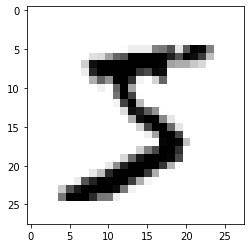

In [9]:
# В каком виде элемент.
print(x_train[0])
plt.imshow(x_train[0], cmap='gray_r')

In [10]:
x_train_flat = x_train.reshape(-1, 28*28)
print(x_train_flat.shape)

x_test_flat = x_test.reshape(-1, 28*28)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [11]:
# SVM классификатор.
svc = SVC()

In [12]:
# Обучаем SVM классификатор.
svc = svc.fit(x_train_flat, y_train)

In [13]:
y_pred = svc.predict(x_test_flat)

(10000,)
[7 2 1 0 4 1 4 9 6 9]


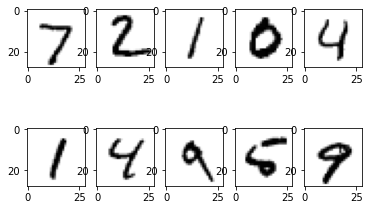

In [14]:
print(y_pred.shape)
print(y_pred[:10])

fig = plt.figure()

for i in range(10):
    im_idx = np.argwhere(y_pred == i)[0]
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(x_test[i], cmap='gray_r')

In [15]:
# Confusion matrix.
confusion_matrix_arr = confusion_matrix(y_test, y_pred)

In [17]:
# Напечатаем confusion matrix.
print(confusion_matrix_arr)

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


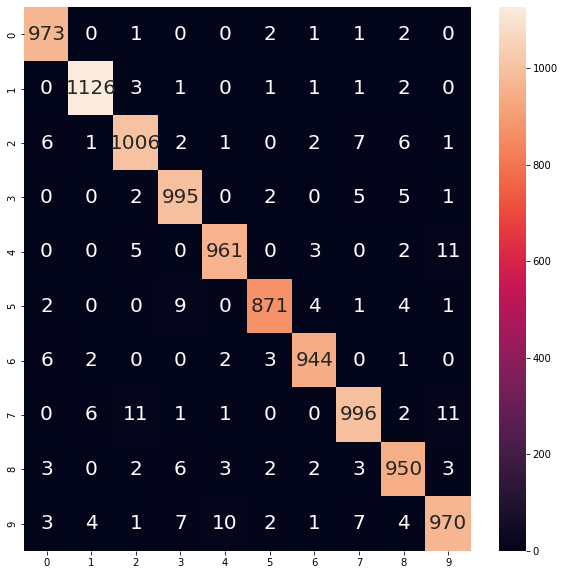

In [18]:
# Напечатаем confusion matrix красиво. =)
# Сделаем из Python массива Pandas DataFrame.
confusion_matrix_df = pd.DataFrame(confusion_matrix_arr)
# Размер картинки.
fig, ax = plt.subplots(figsize=(10,10))
# Seaborn Heatmap
sn.heatmap(confusion_matrix_df, annot=True, fmt='d', ax=ax, annot_kws={"size": 20}) # Размер шрифта.

plt.show()

In [ ]:
# Метрики качества классификации: precision recall f1-score support.
clf_rep = classification_report(y_test, y_pred)

In [ ]:
print(clf_rep)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Домашнее задание:

1. Добавить оценку вероятностей.
```
# Включить оценку вероятностей. (Необходимо сделать до обучения классификатора.)
SVC(probability=True)
# Оценка вероятностей.
svc.predict_proba(x_test_flat)
```
В качестве проверки можно убедиться, что в сумме вероятности дают единицу.

2. Поэкспериментировать с параметрами SVC: C, gamma, kernel.
* Посмотреть, как влияет на confusion_matrix.
* Посмотреть, как влияет на метрики классификации.


Dataset MNIST: картинки с рукописными цифрами.

x: 70_000 картинок размера 28x28.

y: 70_000 значений, какая цифра на картинке (0-9).

Обучаемся на 60_000 примерах, в результате можем распознать, какая цифра изображена на картинке, в т.ч. для тех 10_000 картинок, которые не входили в обучающую выборку.

Реализация с помощью KNN.

In [1]:
# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# В этом примере используем tensorflow только для удобного скачивания данных.
import tensorflow as tf

In [3]:
# Для красивого вывода результатов.
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib - "magic function" IPython shell, которая задаёт вывод matplotlib.
%matplotlib inline

In [4]:
# Будут нужны различные вспомогательные методы из numpy.
import numpy as np

In [5]:
# Скачиваем датасет MNIST с картинками цифр, написанных от руки.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# Посмотрим на обучающую и тестовую выборку.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])
print(y_test[:10])

# Стоит убедиться, что совпадают размеры массивов входных картинок и их правильных ответов.
# И "fail fast", если это не так. Не обучать классификатор на кривых данных.
assert x_train.shape[0] == y_train.shape[0], f"В обучающей выборке размер массива входных картинок ({x_train.shape[0]}) и их правильных ответов ({y_train.shape[0]}) не совпадает."
assert x_test.shape[0] == y_test.shape[0], f"В обучающей выборке размер массива входных картинок ({x_test.shape[0]}) и их правильных ответов ({y_test.shape[0]}) не совпадает."


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

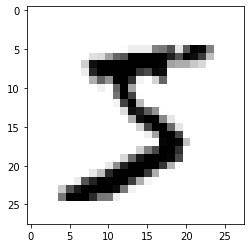

In [7]:
# В каком виде элемент.
print(x_train[0])
plt.imshow(x_train[0], cmap='gray_r')

In [8]:
x_train_flat = x_train.reshape(-1, 28*28)
print(x_train_flat.shape)

x_test_flat = x_test.reshape(-1, 28*28)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [9]:
# KNN классификатор.
knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [10]:
# Обучаем KNN классификатор.
knc = knc.fit(x_train_flat, y_train)

In [11]:
y_pred = knc.predict(x_test_flat)

(10000,)
[7 2 1 0 4 1 4 9 5 9]


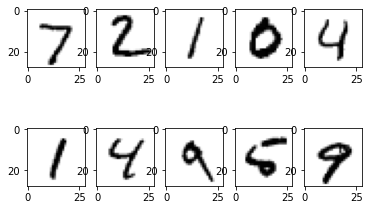

In [12]:
print(y_pred.shape)
print(y_pred[:10])

fig = plt.figure()

for i in range(10):
    im_idx = np.argwhere(y_pred == i)[0]
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(x_test[i], cmap='gray_r')

In [13]:
# Confusion matrix.
confusion_matrix_arr = confusion_matrix(y_test, y_pred)

In [14]:
# Напечатаем confusion matrix.
print(confusion_matrix_arr)

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


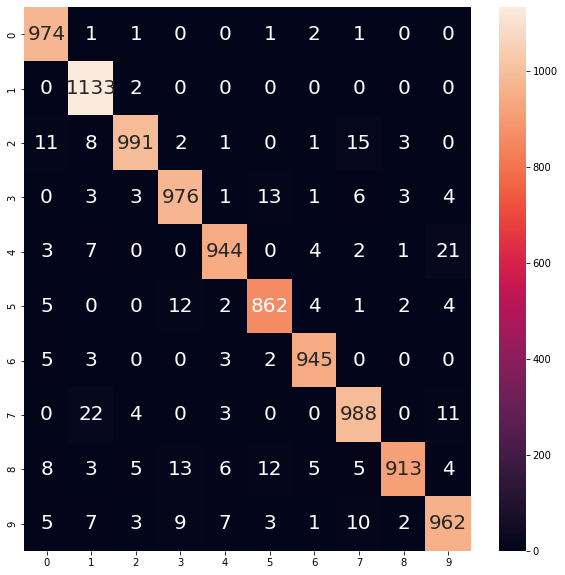

In [15]:
# Напечатаем confusion matrix красиво. =)
# Сделаем из Python массива Pandas DataFrame.
confusion_matrix_df = pd.DataFrame(confusion_matrix_arr)
# Размер картинки.
fig, ax = plt.subplots(figsize=(10,10))
# Seaborn Heatmap
sn.heatmap(confusion_matrix_df, annot=True, fmt='d', ax=ax, annot_kws={"size": 20}) # Размер шрифта.

plt.show()

In [16]:
# Другие метрики качества классификации.
clf_rep = classification_report(y_test, y_pred)

In [17]:
print(clf_rep)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Домашнее задание:

1. Поэкспериментировать с n_neighbors:
* Посмотреть, как влияет на confusion_matrix.
* Посмотреть, как влияет на метрики классификации.


Dataset MNIST: картинки с рукописными цифрами.

x: 70_000 картинок размера 28x28.

y: 70_000 значений, какая цифра на картинке (0-9).

Обучаемся на 60_000 примерах, в результате можем распознать, какая цифра изображена на картинке, в т.ч. для тех 10_000 картинок, которые не входили в обучающую выборку.

Реализация методом KNN.

In [1]:
from collections import Counter
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import time
# Более "низкоуровневый" подход: используем численные методы из библиотеки numpy. Будет посложнее.
import numpy as np

In [2]:
# Для скачивания данных.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Рассчитывает Эвклидовое расстояние.
def euclidean_distance(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [4]:
# Скачиваем данные.
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [5]:
# Посмотрим на данные.
# На момент написания: (70000, 784).
# Обратите внимание, что в этот датасете картинка 28x28 уже линеаризована в массив из 784 пикселей.
print('Количество картинок и их размерность: ', x.shape)
print('Количество правильных ответов к каждой картинке: ', y.shape)

# Стоит убедиться, что совпадает размер массива входных картинок и их правильных ответов.
# И "fail fast", если это не так. Не обучать классификатор на кривых данных.
assert x.shape[0] == y.shape[0], f"Размер массива входных картинок ({x.shape[0]}) и их правильных ответов ({y.shape[0]}) не совпадает."

Количество картинок и их размерность:  (70000, 784)
Количество правильных ответов к каждой картинке:  (70000,)


In [15]:
n_train = 60_000
n_test = 10_000
# Граница (в размере элементов) между обучающей и тестовой выборкой.
split_boundary = 60_000

x_train = x.values[:n_train,:]
y_train = y.values[:n_train]
x_test, y_test = x.values[split_boundary:split_boundary + n_test, :] , y.values[split_boundary:split_boundary + n_test]

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [16]:
# Сделаем из Python массивов Pandas DataFrame для картинок.
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [17]:
# Сделаем из Python массивов Pandas DataFrame для правильных ответов.
y_train_df = pd.DataFrame(data = y_train, columns = ['Цифра'])
y_test_df = pd.DataFrame(data = y_test, columns = ['Цифра'])

In [ ]:
# Список Эвклидовых расстояний.
train_euc_dist = []
# Список индексов
train_idxs = []
# Какие значения K пробуем.
k_vals = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
# Список списков для хранения прогнозируемого значения для каждого K.
train_predictions = [[] for _ in range(len(k_vals))]

# Обучение.
for i in range(0, n_train):
    train_vec_1 = x_train_df.iloc[i]
    # Сравниваем каждый с каждым.
    for j in range(0, n_train):
        train_vec_2 = x_train_df.iloc[j]
        # Вычисляем Эвклидово расстояние.
        euc_dist = euclidean_distance(train_vec_1, train_vec_2)
        train_euc_dist.append(euc_dist)
        # Сохраняем индекс.
        train_idxs.append(j)

    # Словарь с результатами.
    d = {'index': train_idxs, 'distance': train_euc_dist}
    # Создаём Pandas DataFrame
    df = pd.DataFrame(d, columns=['index', 'distance'])
    # Сортируем во возрастанию Эвклидова расстояния.
    df_sorted = df.sort_values(by='distance')

    # Итерируемся по пробным значениям K.
    for k in range(len(k_vals)):
        index_list = list(df_sorted['index'][:k_vals[k]])
        distance = list(df_sorted['distance'][:k_vals[k]])
        res_list = [y_train[i] for i in index_list]
        # Ищем класс с максимальным количеством "голосов".
        pred_value = max(res_list, key=res_list.count)
        # Сохраняем прогнозируемое значение.
        train_predictions[k].append(pred_value)

    # Обнуляем списки.
    train_idxs = []
    train_euc_dist = []

In [ ]:
# Тестирование.
for i in range(0, n_test):
    test_vec_1 = df_test.iloc[i]
    # Каждый с каждым.
    for j in range(0, n_test):
        train_vec_2 = df_train.iloc[j]
        # Вычисляем Эвклидово расстояние.
        euc_dist = euclidean_distance(test_vec_1, train_vec_2)
        test_dist.append(euc_dist)
        # Сохраняем индекс.
        test_idxs.append(j)

    # Словарь с результатами.
    d = {'index': test_idxs, 'distance': test_dist}
    # Создаём Pandas DataFrame
    df = pd.DataFrame(d, columns=['index', 'distance'])
    # Сортируем во возрастанию Эвклидова расстояния.
    df_sorted = df.sort_values(by='distance')

    # Итерируемся по пробным значениям K.
    for k in range(len(k_vals)):
        index_list = list(df_sorted['index'][:k_vals[k]])
        distance = list(df_sorted['distance'][:k_vals[k]])
        res_list = [train_predictions[k][ind] for ind in index_list]
        # Ищем класс с максимальным количеством "голосов".
        pred_value = max(res_list, key=res_list.count)
        # Сохраняем прогнозируемое значение.
        test_pred_lists[k].append(pred_value)

    # Обнуляем списки.
    test_idxs = []
    test_dist = []

In [ ]:
# Вычисляем результаты для тестовой выборки.
test_pred = 0
test_pred_result = []
for K in range(len(k_values)):
    for l1,l2 in zip(test_pred_lists[K], y_test.tolist()):
        if l1 == l2:
            test_pred += 1
    accuracy = test_pred/1000
    test_pred_result.append((round(accuracy*100,2)))
    print('The test accuracy is '+str(accuracy*100)+'% for K='+str(k_values[K]))
    test_pred = 0

The test accuracy is 90.4% for K=1
The test accuracy is 90.9% for K=3
The test accuracy is 91.5% for K=5
The test accuracy is 90.4% for K=7
The test accuracy is 89.8% for K=9
The test accuracy is 88.4% for K=11
The test accuracy is 88.9% for K=13
The test accuracy is 88.3% for K=15
The test accuracy is 87.9% for K=17
The test accuracy is 87.6% for K=19
The test accuracy is 86.8% for K=21


# MNIST: мотивация использовать нейросети

In [0]:
import tensorflow as tf  # пока что используем этот пакет только для скачки данных :)
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [0]:
# скачиваем данные
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [3]:
# что за данные
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


Пример кусочка картинки (пиксели со значениями от 0 до 255):


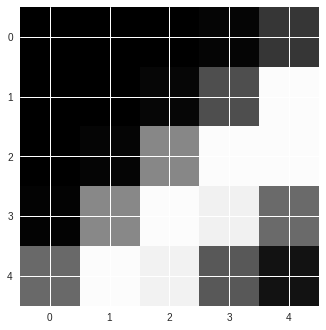

Пример картинки:


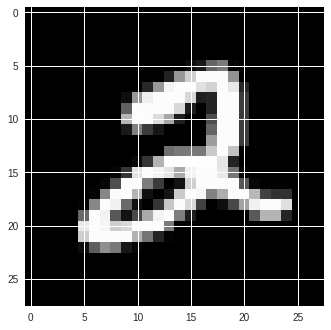

y_train [shape (60000,)] 10 примеров:
 [5 0 4 1 9 2 1 3 1 4]


In [4]:
# нарисуем картинку
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочка картинки (пиксели со значениями от 0 до 255):")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

# Линейная модель

Линейная модель не умеет работать с двумерным входом, поэтому предлагается превратить картинку 28x28 в вектор длины 28*28=784, выписав ее построчно!

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="400">


In [9]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)

x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val_flat.shape)

(60000, 784)
(10000, 784)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val_flat)

In [18]:
# кусочек фичей
x_train_flat[0, ::20]

array([ 0.        ,  0.        , -0.03059266, -0.00852241, -0.01408835,
       -0.2625969 , -0.16124756,  0.        ,  1.71565971,  0.74933951,
       -0.11300485, -0.19700703,  1.12192712,  0.27021375, -0.00577281,
       -0.70132425,  1.64634567, -0.1273685 , -0.15382451, -0.19833719,
       -0.70732309, -0.00477028, -0.60978718, -0.9194134 , -0.17786005,
       -0.16833376,  0.65022085, -0.63188648,  0.        , -0.48806277,
        1.17394853, -0.14774138, -0.07003976, -0.61257571,  3.52099754,
        0.        , -0.09396514, -0.1826269 , -0.00579016,  0.        ])

In [19]:
%%time
# обучаем линейную модель, обучается градиентными методами оптимизации
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
clf.fit(x_train_flat, y_train)

CPU times: user 1min 16s, sys: 4.94 s, total: 1min 21s
Wall time: 41.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
# не так плохо работает!
from sklearn.metrics import accuracy_score
accuracy_score(y_val, clf.predict(x_val_flat))

0.9246

# Градиентный бустинг

<img src="https://www.researchgate.net/profile/Maria_Peraita-Adrados/publication/326379229/figure/fig5/AS:647978477948928@1531501516288/A-simple-example-of-visualizing-gradient-boosting_W640.jpg" width="300">

Над деревьями делают бустинг и это алгоритм №1 на Kaggle! Проверим в нашей задаче!

In [32]:
%%time
# очень долго работает (потому что алгоритм переборный)!
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.3, n_estimators=10, verbose=1, subsample=0.5)
clf.fit(x_train_flat, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       39985.6554       28714.1686            3.32m
         2       31412.0718        8641.5732            2.95m
         3       25408.3052        5680.0781            2.64m
         4       21762.9822        3544.6881            2.28m
         5       19197.6986        2600.7659            1.89m
         6       17329.1094        1901.8676            1.51m
         7       15265.1690        1804.2433            1.13m
         8       13979.1283        1277.8810           45.27s
         9       13082.2559         908.0964           22.60s
        10       12156.0697         921.5624            0.00s
CPU times: user 3min 48s, sys: 75 ms, total: 3min 48s
Wall time: 3min 48s


In [33]:
# качество так себе, а если картинка будет 300x300 это будет еще и вечность работать!
accuracy_score(y_val, clf.predict(x_val_flat))

0.8909

# Нейросети

Соберем сложную функцию как комбинацию простых линейных моделей (например, логистических регрессий):

<img src="https://cdn-images-1.medium.com/max/1600/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png" width="300">

Для оптимизации всех параметров нам не нужен перебор, мы можем честно посчитать производную потерь по каждому параметру и чуточку их подвинуть! Это работает очень быстро!


In [34]:
%%time
from sklearn.neural_network import MLPClassifier  # многослойный персептрон (просто много полносвязных слоев)
clf = MLPClassifier(max_iter=10, random_state=0)
clf.fit(x_train_flat, y_train)

CPU times: user 25.9 s, sys: 8.32 s, total: 34.2 s
Wall time: 17.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
accuracy_score(y_val, clf.predict(x_val_flat))

0.9742